# Astropy Cosmologies

Astropy includes a convenient framework for defining cosmologies and working with realizations thereof.  These realizations hold the cosmological parameters and enable computation of a variety of redshift-parameterized properties, e.g. the luminosity distance.

For more information about the features presented below, please see the
[astropy.cosmology](https://docs.astropy.org/en/stable/cosmology/index.html) docs.

Also note that this tutorial assumes you have little or no knowledge of the astropy cosmology docs.  If you're familiar with them and have interest in extending this framework to more cosmologies, realizations, or methods, Astropy always welcomes contributions.

## Introduction

The [``astropy.cosmology``](https://docs.astropy.org/en/stable/cosmology/index.html) package provides an object-oriented approach to cosmology that tightly integrates with the rest of the Astropy ecosystem, and units in particular.

With that in mind, the following is the standard set of imports to begin working with the cosmology package.

In [1]:
from astropy import cosmology
import astropy.units as u

The first thing we will need is to select a cosmology, essentially the physics, in which to work. The most commonly used is a flat $\Lambda$CDM cosmology with a Friedmann–Lemaître–Robertson–Walker (FLRW) metric. We will use it here as well.

Concordant to OOP, in ``astropy.cosmology`` the cosmology types are classes and realizations of those cosmologies are instances of the classes. We can import the flat-$\Lambda$CDM cosmology and examine its public methods and attributes:

In [2]:
from astropy.cosmology import FlatLambdaCDM  # same as cosmology.FlatLambdaCDM

pubdir = {x for x in dir(FlatLambdaCDM) if not x.startswith("_")}
print("Attributes: ", {x for x in pubdir if not callable(getattr(FlatLambdaCDM, x))})
print("\nMethods: ", {x for x in pubdir if callable(getattr(FlatLambdaCDM, x))})

Attributes:  {'m_nu', 'critical_density0', 'Tcmb0', 'hubble_time', 'Onu0', 'H0', 'Ok0', 'name', 'hubble_distance', 'Neff', 'h', 'Ogamma0', 'Odm0', 'Om0', 'Ob0', 'Ode0', 'Tnu0', 'has_massive_nu'}

Methods:  {'Ok', 'Om', 'comoving_volume', 'abs_distance_integrand', 'angular_diameter_distance_z1z2', 'Ode', 'comoving_transverse_distance', 'comoving_distance', 'arcsec_per_kpc_proper', 'lookback_time', 'luminosity_distance', 'Ogamma', 'de_density_scale', 'differential_comoving_volume', 'critical_density', 'scale_factor', 'efunc', 'inv_efunc', 'Tcmb', 'Onu', 'age', 'w', 'kpc_proper_per_arcmin', 'lookback_time_integrand', 'Ob', 'lookback_distance', 'Tnu', 'kpc_comoving_per_arcmin', 'arcsec_per_kpc_comoving', 'clone', 'nu_relative_density', 'Odm', 'absorption_distance', 'H', 'angular_diameter_distance', 'distmod'}


Most of the attributes are for components to the energy density (e.g. `.Onu0`) or derivations like the Hubble time (`.hubble_time`).

The methods are for more involved calculations, like the comoving volume (``.comoving_volume()``).

Before we dive into using the ``FlatLambdaCDM`` cosmology, it is worth noting that there are numerous other cosmologies, many offering alternative dark energy models.

In [3]:
from astropy.cosmology import Cosmology  # the base class

def all_subclasses(cosmo):  # recursively find all subclasses
    yield cosmo.__qualname__
    for c in cosmo.__subclasses__(): yield from all_subclasses(c)

print("Other available cosmologies:", ", ".join(all_subclasses(Cosmology)))

Other available cosmologies: Cosmology, FLRW, LambdaCDM, FlatLambdaCDM, wCDM, FlatwCDM, w0waCDM, Flatw0waCDM, wpwaCDM, w0wzCDM


To work with a cosmology we must create an instance, a *realization*, of the cosmology class.
A realization sets single values for the cosmological parameters and allows for numerical computation.

In [4]:
# make a realization, setting the required H0 & Om0 and overriding the default Tcmb0
cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3, Tcmb0=2.7*u.K)
cosmo

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=2.7 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=None)

Now the attributes and methods shown above can be called.

In [5]:
cosmo.H0

<Quantity 70. km / (Mpc s)>

In [6]:
cosmo.hubble_time

<Quantity 13.96846031 Gyr>

In [7]:
cosmo.angular_diameter_distance_z1z2(2, 4)

<Quantity 397.89919802 Mpc>

In [8]:
# these also work with vectorized input
cosmo.comoving_distance([1, 2, 3, 4, 5])

<Quantity [3303.53737457, 5179.04318219, 6354.34269871, 7168.53917228,
           7773.09684295] Mpc>

## Built-in Cosmology Realizations


While the cosmology classes support arbitry realizations, most often we are looking to work with a "standard" cosmology, such as the Planck 2018 best-fit values.

Astropy provides a number of these built-in realizations:

In [9]:
print(cosmology.realizations.__all__[1:])

['Planck18', 'Planck18_arXiv_v2', 'Planck15', 'Planck13', 'WMAP9', 'WMAP7', 'WMAP5']


From hereon we will work with the ``Planck18`` realization.

In [10]:
from astropy.cosmology import Planck18; Planck18

FlatLambdaCDM(name="Planck18", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)

The Planck'18 realization sets the cosmology components, the temperature, and also has massive neutrinos.

Astropy ``cosmology`` and ``Quantity``s are built on NumPy, meaning that all methods are vectorized.
We can see this in the following plot showing the Universe's age as a function of redshift.

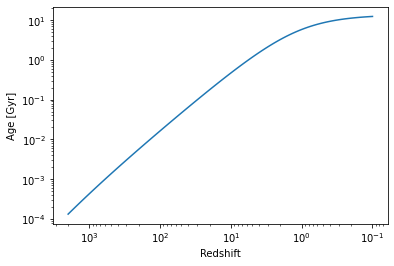

In [11]:
import numpy as np
import matplotlib.pyplot as plt

z = np.geomspace(0.1, 2e3, num=100)

fig = plt.figure()
ax = fig.add_subplot(xlabel="Redshift", ylabel="Age [Gyr]")
ax.loglog(z, Planck18.age(z))
ax.invert_xaxis()
plt.show();

### Modifying a Realization

Cosmology realizations are immutable, but it's often useful to "perturb" about a cosmology. For this, cosmologies have a ``.clone()`` method that can also override any value, but keeps the remaining the same. For example,

In [12]:
newcosmo = Planck18.clone(Om0=0.4, Ob0=0.3)  # override 
newcosmo

FlatLambdaCDM(name="Planck18 (modified)", H0=67.7 km / (Mpc s), Om0=0.4, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.3)

We can see the difference between ``Planck18`` and the new cosmology.

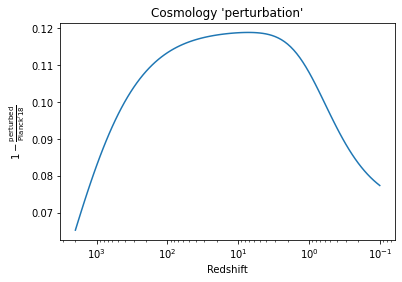

In [13]:
fig = plt.figure()
ax = fig.add_subplot(title="Cosmology 'perturbation'", xlabel="Redshift", ylabel=r"$1 - \frac{\rm{perturbed}}{\rm{Planck'18}}$")
ax.semilogx(z, np.abs(1 - newcosmo.age(z)/Planck18.age(z)))
ax.invert_xaxis()
plt.show();

## The Default Realization

Consider the ``coordinates.Distance`` function. It is Astropy's flexible method to describe distances and understand the connection between distance, parallax, and other related distance measures.

In [14]:
from astropy.coordinates import Distance
d = Distance(100 * u.Mpc)

In [15]:
d.parallax

<Angle 1.e-05 marcsec>

In [16]:
d.distmod

<Quantity 35. mag>

In [17]:
d.z  # the redshift

0.02219437761440318

The redshift calculation requires a Cosmology.
When a ``Distance`` is initialized, it accepts the cosmology as a keyword argument, but if one is not provided, it will fall back to a default value. This default cosmology realization is controlled by the [``cosmology.default_cosmology``](https://docs.astropy.org/en/stable/api/astropy.cosmology.default_cosmology.html) global state (for more information see [``ScienceState``](https://docs.astropy.org/en/stable/api/astropy.utils.state.ScienceState.html)).

Lets take a closer look.

In [18]:
from astropy.cosmology import default_cosmology

In [19]:
# the public methods
{x for x in dir(default_cosmology) if not x.startswith("_")}

{'get', 'get_cosmology_from_string', 'set', 'validate'}

The ``get``/``set`` methods are the standard interface.

``get`` will return the curent default cosmology realization,

In [20]:
default_cosmology.get()  # to get the default Cosmology

FlatLambdaCDM(name="Planck18", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)

while ``set`` will set the default cosmology realization. If used as a [context-manager](https://docs.python.org/3/reference/compound_stmts.html#the-with-statement), the changed default cosmology realization
will revert to the old default.

In [21]:
with default_cosmology.set("WMAP5"):
    cosmo = default_cosmology.get()
    print("New: ", cosmo.name)
print("Reverted: ", default_cosmology.get().name)

New:  WMAP5
Reverted:  Planck18


Returning to ``Distance``, we can see how chaning the default cosmology realization will impact redshift calculations

In [22]:
d = Distance(100 * u.Mpc)
dz = d.z

In [23]:
with default_cosmology.set("WMAP5"):
    print(d.z - dz)

0.0008059197634152568


For a stable distance-to-redshift, initialize ``Distance`` with a cosmology.

In [24]:
Distance(z=0.1, cosmology=default_cosmology.get_cosmology_from_string("Planck13"))

<Distance 475.14001994 Mpc>

## Equivalencies

Equivalencies can be used to convert quantities that are not strictly the same physical type, but in a specific context are interchangable.  

In [25]:
distance = 105 * (u.Mpc/u.littleh)

In [26]:
# This raises an error because they are different units.
try:
    distance.to(u.Mpc)
except u.UnitConversionError:
    print("Cannot convert incompatible units.")

Cannot convert incompatible units.


For cosmologies, Astropy offers a $h$ - $H_0$ equivalency for switching between the unitless and unit-ful Hubble constant. 

In [27]:
# This succeeds using equivalencies.
H0_70 = 70 * u.km / u.s / u.Mpc

distance.to(u.Mpc, u.with_H0(H0_70))

<Quantity 150. Mpc>

And vice versa

In [28]:
(150 * u.Mpc).to(u.Mpc/u.littleh, u.with_H0(H0_70))

<Quantity 105. Mpc / littleh>

This equivalency works for arbitrary Quantities.

In [29]:
luminosity = 0.49 * u.Lsun * u.littleh**-2
luminosity.to(u.Lsun, u.with_H0(H0_70))

<Quantity 1. solLum>

Note that the equivalency is cosmology dependent.

In [30]:
print(distance.to(u.Mpc, u.with_H0(H0_70)),
      distance.to(u.Mpc, u.with_H0(Planck18.H0)), sep="\n")

150.0 Mpc
155.1877032219923 Mpc


To perform a number of computations with the same cosmology, use [astropy.units.add_enabled_equivalencies](https://docs.astropy.org/en/stable/api/astropy.units.add_enabled_equivalencies.html?highlight=add_enabled_equivalencies). When done as a ``with`` statement, this equivalency will only be enabled within the block and prevent mistakenly using the Planck18 equivalency when working with, e.g., WMAP data.

In [31]:
with u.add_enabled_equivalencies(u.with_H0(Planck18.H0)):
    print(f"distance: {distance.to(u.Mpc)}",
          f"luminosity: {luminosity.to(u.Lsun)}",sep="\n")

distance: 155.1877032219923 Mpc
luminosity: 1.0703654769474296 solLum


There's a lot of flexibility with equivalencies, including a variety of other built-in equivalencies, useful in difference contexts.  So if you want to know more, you might want to check out the [equivalencies narrative documentation](https://docs.astropy.org/en/stable/units/equivalencies.html) or the [astropy.units.equivalencies reference docs](https://docs.astropy.org/en/stable/units/index.html#module-astropy.units.equivalencies).

# Putting it all together:  a concise example


Let's say we have a data set with an array of luminosity distances and we are interested in finding the 

In [101]:
from astropy.cosmology import z_at_value  # only works on scalar inputs

In [95]:
N = 100
distances = Distance(np.linspace(45, 2535, N) * u.Mpc)

In [108]:
perturb_Om0 = np.linspace(-0.2, 0.2, num=50)
num = 50
zs = np.empty((num, N))

for i, cosmo in enumerate(Planck18.clone(Om0=Planck18.Om0+dm, Ob0=Planck18.Om0+dm-0.001) for dm in perturb_Om0):
    zs[i] = [z_at_value(cosmo.luminosity_distance, d) for d in distances]

zs.shape

(50, 100)

<ipython-input-107-544d91b11045>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


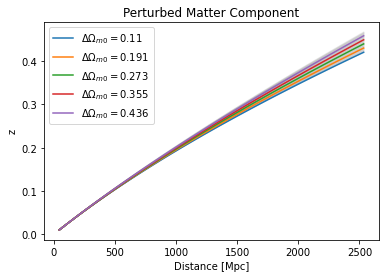

In [107]:
fig = plt.figure()
ax = fig.add_subplot(title="Perturbed Matter Component", xlabel="Distance [Mpc]", ylabel="z")
ax.plot(distances, zs.T, c="gray", alpha=0.1);
for z, dm in zip(zs[::10, :], perturb_Om0[::10]):
    ax.plot(distances, z, label=r"$\Delta\Omega_{m0}=$" + f"{Planck18.Om0+dm:.3}")
ax.legend()
fig.show();

# Exercises

## Exercise 1

Compute the redshift of matter-radiation equality for the Planck 2018 flat-$\Lambda$CDM realization.

In [ ]:
# Answer here (z)

In [ ]:
# Answer here (comoving distance)